***Importing libraries***

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

In [60]:
file_path_train = r'C:\Users\User\Desktop\Main\7 semester\ML\Iris.csv'
df_train = pd.read_csv(file_path_train)
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [61]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


***Data preprocessing***

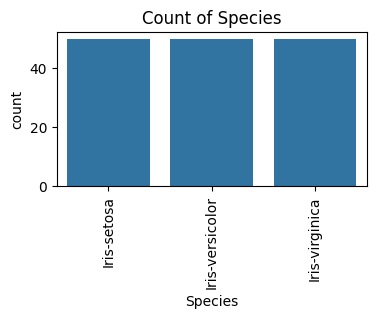

In [62]:
for column_name in df_train.columns:
    if df_train[column_name].dtype == 'object':
        plt.figure(figsize=(4, 2))  
        sns.countplot(x=column_name, data=df_train)
        plt.title(f'Count of {column_name}')
        plt.xticks(rotation=90) 
        plt.show()

In [63]:
df_train = df_train.drop(columns=['Id'], axis=1)

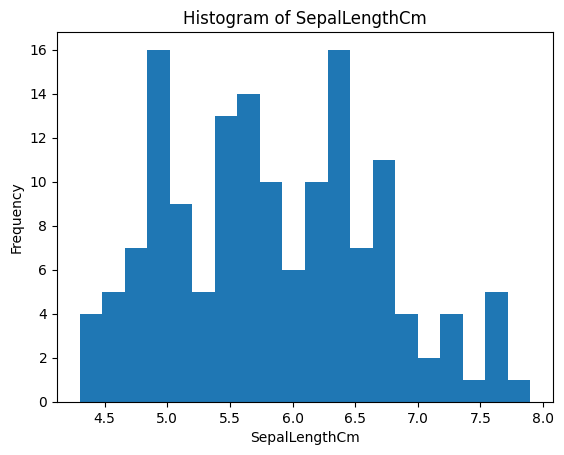

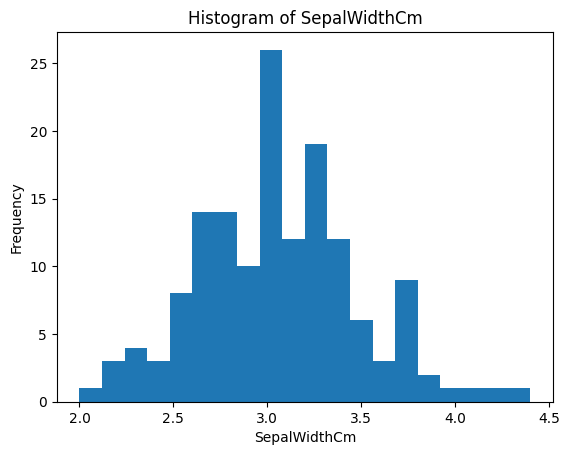

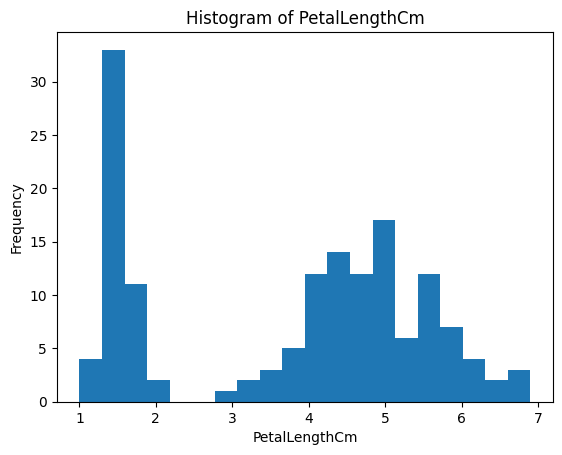

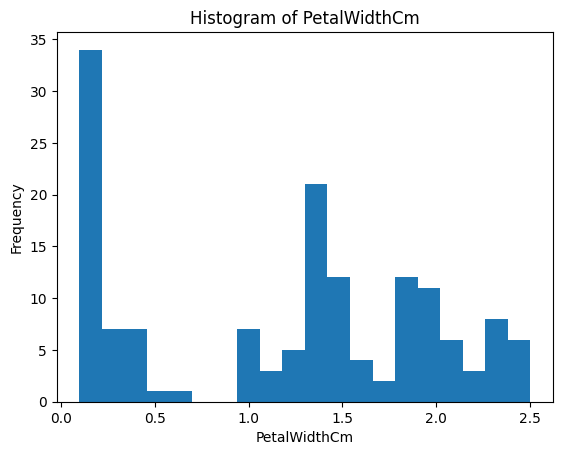

In [64]:
for column_name in df_train.columns:
    if df_train[column_name].dtype in ['int64', 'float64']:
        plt.hist(df_train[column_name], bins=20)
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

In [65]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_train['Species'] = label_encoder.fit_transform(df_train['Species'])

In [66]:
Y = df_train['Species']
X = df_train.drop('Species', axis=1)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)
X_normalized

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [68]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, Y, test_size=0.2, random_state=42)
X_train

array([[-1.50652052e+00,  1.26346019e+00, -1.56873522e+00,
        -1.31297673e+00],
       [-1.73673948e-01,  3.11468391e+00, -1.28440670e+00,
        -1.05003079e+00],
       [ 1.03800476e+00,  1.06445364e-01,  3.64698715e-01,
         2.64698913e-01],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
        -1.31297673e+00],
       [-1.74885626e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [ 5.53333275e-01, -1.28197243e+00,  7.05892939e-01,
         9.22063763e-01],
       [ 6.74501145e-01,  3.37848329e-01,  4.21564419e-01,
         3.96171883e-01],
       [-7.79513300e-01,  1.03205722e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-7.79513300e-01,  2.42047502e+00, -1.28440670e+00,
        -1.44444970e+00],
       [-5.25060772e-02, -8.19166497e-01,  7.62758643e-01,
         9.22063763e-01],
       [ 1.89829664e-01,  8.00654259e-01,  4.21564419e-01,
      

***Handmade class***

In [69]:
class SupportVectorMachine:
    def __init__(self, learning_rate, regularization_param, epochs):
        self.learning_rate = learning_rate
        self.regularization_param = regularization_param
        self.epochs = epochs
        self.weights = None
        self.bias = None
        self.classifiers = {}

    def train(self, X, y):
        unique_classes = np.unique(y)

        for class_label in unique_classes:
            binary_labels = np.where(y == class_label, 1, -1)
            model = self._train_single_class(X, binary_labels)
            self.classifiers[class_label] = model
        return self.classifiers
    
    def _train_single_class(self, X, y):
        y_transformed = np.where(y <= 0, -1, 1)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for i in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_transformed[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.learning_rate * (2 * self.regularization_param * self.weights)
                else:
                    self.weights -= self.learning_rate * (
                        2 * self.regularization_param * self.weights - np.dot(x_i, y_transformed[idx])
                    )
                    self.bias -= self.learning_rate * y_transformed[idx]
        return {'weights': self.weights, 'bias': self.bias}

    def predict(self, X):
        predictions = []

        for class_label in self.classifiers:
            model = self.classifiers[class_label]
            approximations = np.dot(X, model['weights']) - model['bias']
            predictions.append(approximations)
        return np.argmax(predictions, axis=0)

In [70]:
clf = SupportVectorMachine(learning_rate=0.01, regularization_param=0.05, epochs=500)
clf.train(X_train, y_train)
predictions = clf.predict(X_test)

print(predictions)

#Calculating evaluation metrics
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of the SVM model: {accuracy}")

conf_m = confusion_matrix(y_test, predictions)
print(f"Confusion matrix of the SVM model: {conf_m}")

r2 = r2_score(y_test, predictions)
print(f"R2 score of the SVM model: {r2}")

[1 0 2 2 2 0 1 2 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Accuracy of the SVM model: 0.9
Confusion matrix of the SVM model: [[10  0  0]
 [ 0  6  3]
 [ 0  0 11]]
R2 score of the SVM model: 0.8569157392686804


***Result from Sklearn***

In [71]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear')

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the SVM model: {accuracy}")

conf_m = confusion_matrix(y_test, y_pred)
print(f"Confusion matrix of the SVM model: {conf_m}")

r2 = r2_score(y_test, y_pred)
print(f"R2 score of the SVM model: {r2}")

Accuracy of the SVM model: 0.9666666666666667
Confusion matrix of the SVM model: [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
R2 score of the SVM model: 0.9523052464228935
